# BANKING CAMPAIGN

# Content
<ol>
    <li> Context </li>
    <li> Objetive </li>
    <li> EDA </li>
    <li> Conclusions </li>
    <li> Recommendations </li>
    

# 1. Context
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution.
# 2. Objetive
The exploration goal is identify which potencial client profile (lead) is more likely to subscribe to a term deposit (column "y") to increase conversion rate and reduce cost per conversion.

# 3. Exploring Data Analysis - EDA

## Importing packages and loading data

In [1]:
# importing packages of data frames and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
# loading data
df=pd.read_csv('train.csv')

## Preview

<ul>
    <li> Data has 17 columns and 45211 records and has no nulls or missing data
    <li> Overall, data has the right type. However, I will include new columns to make processing easier
    <li> Data are organized in 2 groups and 4 subgroups: 
<ul>
    <li> Lead profile
        <ul>
            <li> Personal information (4 columns)
            <li> Financial Behavior (4 columns)
        </ul>
    <li> Campaign Execution Data
        <ul>
            <li> Last campaign (5 columns)
            <li> Previous campaign (3 columns)
        </ul>

In [3]:
# identifying number of columns and rows
df.shape

(45211, 17)

In [4]:
# identifying data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# identifying numbers of nulls per column
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# exploring columns
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
# exploring statistics of numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# expling statistics of categorical data
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Exploring columns

### Campaing Results: column "Y"

<ul>
    <li> Column "Y" show the outcome of the campaign: conversion
    <li> If the lead has subscribed to the term deposit is "yes" or has rejected it is "no" </li> 
    <li> Data has 45211 leads </li> 
    <li> Conversion was 11.7% </li> 
    <li> I'm creating a new column "conversion" to simplify coding when calculating lead conversions </li> 

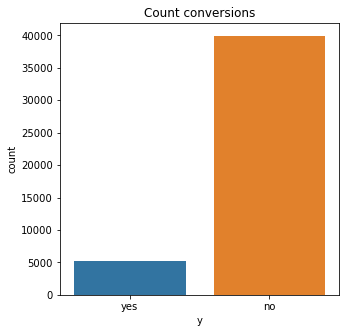

In [9]:
# Count conversion
mpl.rcParams['figure.figsize'] = (5,5)
fig=sns.countplot(x='y', data=df, order=['yes', 'no'])
fig.set(title='Count conversions')
plt.show()

In [10]:
# Calculating overall conversion
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [11]:
# Creating a new column "conversion" to simplify coding when calculating lead conversions
for index, row in df.iterrows() :
    if df.loc[index, 'y'] == 'yes' :
        df.loc[index, 'conversion'] = 1
    else :
        df.loc[index, 'conversion'] = 0

### Exploring Conversion by Personal Information
<ul>
    <li>Personal information has 4 columns:
        <ul>
            <li> Job: Job, ocupation or employment status </li>
            <li> Marital: Marital status </li>
            <li> Education: Higher level of education reached </li>
            <li> Age </li>
        </ul>
    <li> I'm creating a function to make easier the column exploration, show conversion bar charts in descending order and count bar charts with a custom size

In [12]:
# Creating a function to show conversion bar charts in descending order and count bar charts with a custom size
def exploring_chart(column,dataframe,width,height):
    fig, axes = plt.subplots(1, 2, figsize=(width,height))
    conversion_list = round(dataframe.groupby(column).conversion.mean().sort_values(ascending=False),2)
    conversion_df = conversion_list.reset_index()
    sns.barplot(x='conversion', y=column, data=conversion_df, order=conversion_list.index ,ax=axes[0])
    sns.countplot(y=column, data=dataframe, order=conversion_list.index, ax=axes[1])
    plt.show()
    print(conversion_df)

#### Job
<ul>
    <li> There are 11 types of occupation including retired, student, self-employed, and unemployed </li> 
    <li> Null data was filled with "unknown" </li>
    <li> Most common jobs are blue-collarm, management and technician </li>
    <li> Students and retired have higher conversions at 29% and 23% respectively </li>
    <li> The issues is that the customer base has a small number of students and retirees compared to blue-collars, managements and technicians  </li>

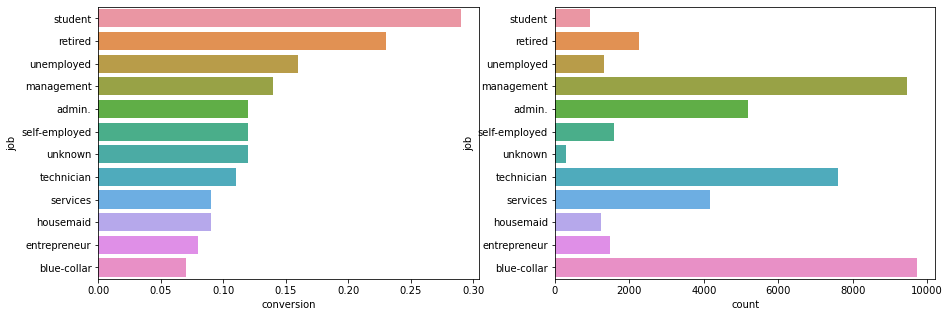

              job  conversion
0         student        0.29
1         retired        0.23
2      unemployed        0.16
3      management        0.14
4          admin.        0.12
5   self-employed        0.12
6         unknown        0.12
7      technician        0.11
8        services        0.09
9       housemaid        0.09
10   entrepreneur        0.08
11    blue-collar        0.07


In [13]:
# Exploring job column
exploring_chart('job',df,15,5)

####  Marital
<ul>
    <li> There are 3 marital status: married, single, and divorced </li> 
    <li> Married is the most common status, followed by single and then divorced. Note: "divorced" means divorced or widowed</li>
    <li> Singles have the highest conversion at 15%, and married have the lowest at 10%</li>

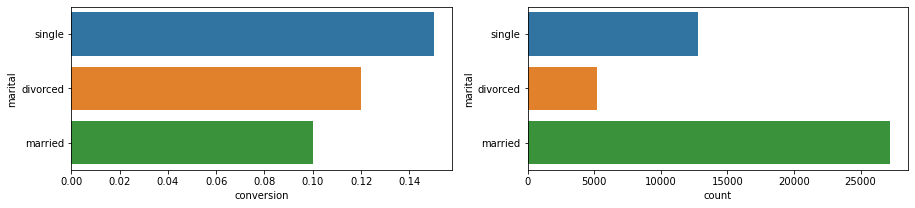

    marital  conversion
0    single        0.15
1  divorced        0.12
2   married        0.10


In [14]:
# exploring marital column
exploring_chart('marital',df,15,3)

####  Education
<ul>
    <li> There are 3 education level reached: primary, secondary, and tertiary </li>
    <li> Null data was filled with "unknown" </li>
    <li> Secondary is the most common education reached, followed by terciary and then primary </li>
    <li> Leads with terceary education have the highest conversion at 15% and leads with primary education have the smallest conversion at 9% </li>

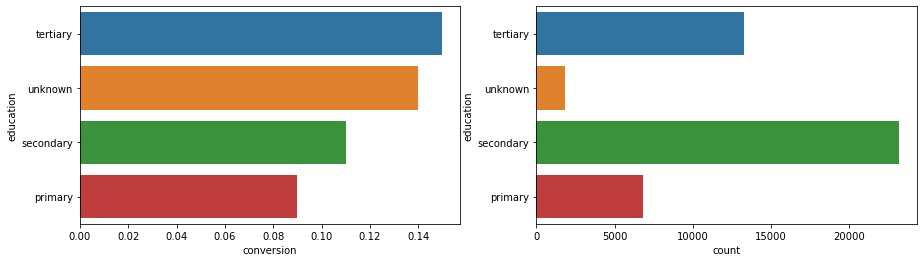

   education  conversion
0   tertiary        0.15
1    unknown        0.14
2  secondary        0.11
3    primary        0.09


In [15]:
# exploring education column
exploring_chart('education',df,15,4)

####  Age
<ul>
    <li> Age columns has a wide range starting at 18 and going up to 95 </li>
    <li> Segmentation by age has a huge impact in conversions </li>
    <li> I'm creating a new column "age range" to easily segment leads by age </li>

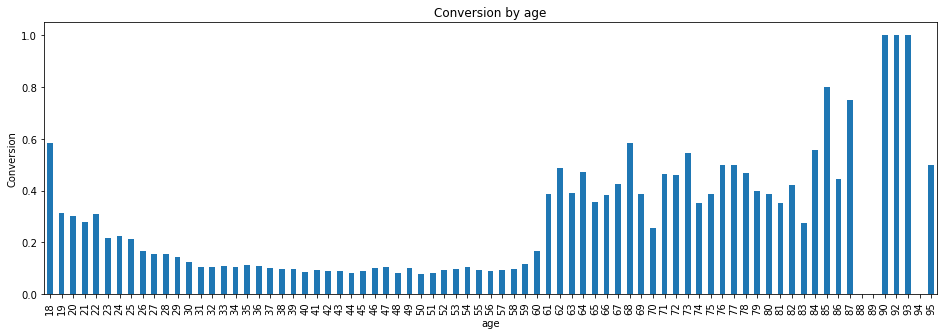

In [16]:
# Exploring conversion by age
mpl.rcParams['figure.figsize'] = (16,5)
df.groupby('age').conversion.mean().plot.bar(ylabel='Conversion', title='Conversion by age')
plt.show()

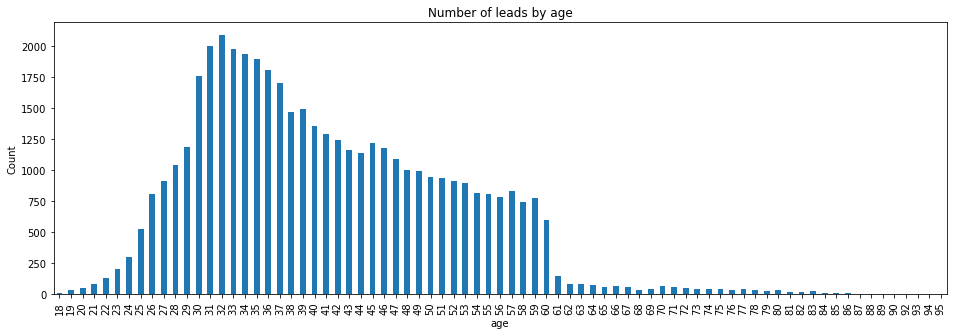

In [17]:
# Exploring age column 
mpl.rcParams['figure.figsize'] = (16,5)
df.groupby('age')['y'].count().plot.bar(ylabel='Count', title='Number of leads by age')
plt.show()

In [18]:
# Creating a new column "age range" to segment leads easily by age
for index, row in df.iterrows() :
    if df.loc[index, 'age'] <= 25 :
        df.loc[index, 'age range'] = '18 to 25'
    elif df.loc[index, 'age'] <= 30 :
        df.loc[index, 'age range'] = '26 to 30'
    elif df.loc[index, 'age'] <= 40 :
        df.loc[index, 'age range'] = '31 to 40'
    elif df.loc[index, 'age'] <= 60 :
        df.loc[index, 'age range'] = '41 to 60'
    else :
        df.loc[index, 'age range'] = '> 60'

####  Age range
<ul>
    <li> Leads over 60 years old have conversion greater than 40%. However this customer base is pretty small  </li>
    <li> Young adults between 18 to 25 have conversion at 24% </li>
    <li> Median ages between 26 and 60 years have a conversion lower than 14%. However, they are the most common ages. This age range will need deeper segmentation to increase conversion </li>

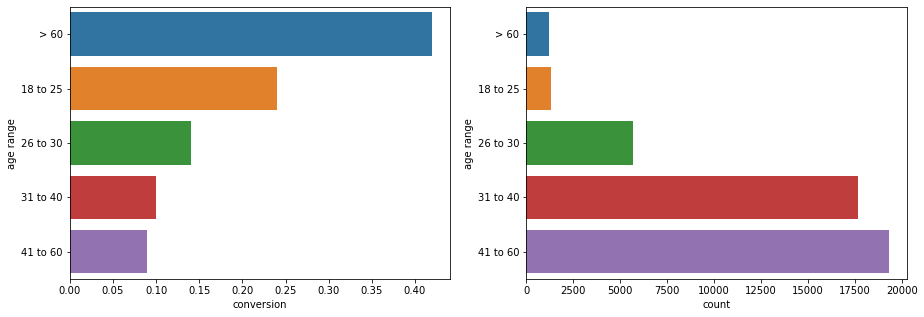

  age range  conversion
0      > 60        0.42
1  18 to 25        0.24
2  26 to 30        0.14
3  31 to 40        0.10
4  41 to 60        0.09


In [19]:
# Exploring age range
exploring_chart('age range',df,15,5)

###  <span style="color:red"> Insight N° 1: Segmentation by age has a strong impact on conversions, and will be the first step in the targeting process. Leads over 60 years old will be our first target with conversion over 40%. </span>

### Exploring Conversion by Financial Behavior
<ul>
    <li> Financial behavior has 4 columns: </li>
    <ul>
        <li> Housing: Does the lead have a mortage loan? Yes/No </li>
        <li> Loan: Does the lead have a personal loan? Yes/No </li>
        <li> Default: Does the lead have a credit in default? Yes/No </li>
        <li> Balance: Average yearly balance, in euros </li> </ul>
    <li> Overall, leads without any loans are twice as likely to convert as those with loans </li>
        

####  Housing
<ul>
    <li> Proportion between leads who have a mortage or not is quite similar </li>
    <li> Leads without housing loans have double conversion (17%) than leads with debts (8%) </li>

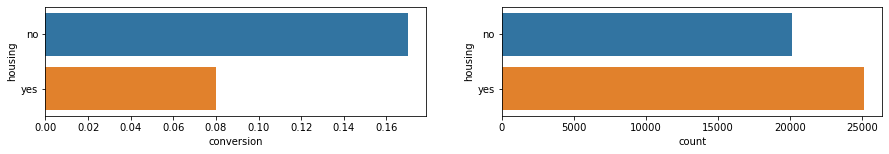

  housing  conversion
0      no        0.17
1     yes        0.08


In [20]:
# Exploring housing column
exploring_chart('housing',df, 15,2)

####  Loan
<ul>
    <li> Most of leads don't have a personal loan </li>
    <li> Leads without personal loans have almost a double conversion (13%) than leads with debts (7%) </li>

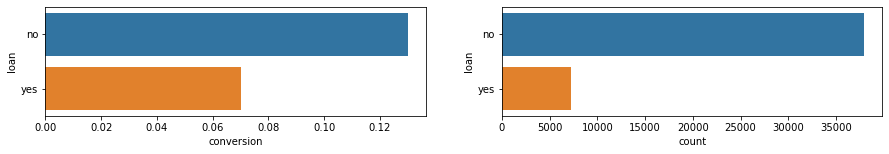

  loan  conversion
0   no        0.13
1  yes        0.07


In [21]:
# Exploring loan column
exploring_chart('loan',df, 15,2)

####  Default
<ul>
    <li> Most of leads don't have a credit in default </li>
    <li> Leads without credit in default have double conversion (12%) than leads with credits in default (6%) </li>

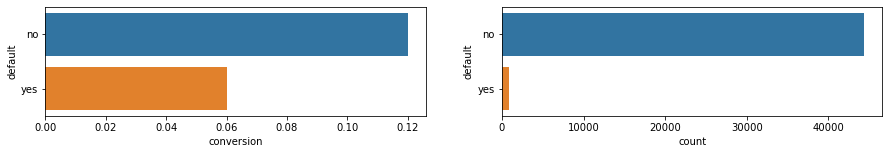

  default  conversion
0      no        0.12
1     yes        0.06


In [22]:
# Exploring default column
exploring_chart('default',df,15,2)

####  Balance
<ul>
    <li> Balance columns has a wide range starting at negative balance and going up to 100K </li>
    <li> The most common balance is between 0K and 1K </li>
    <li> I'm creating a new column "balance range" to easily segment leads by balance </li>
    <li> Leads with balance higher than 1K and 10K have the highest conversion at 15% and 16% </li>

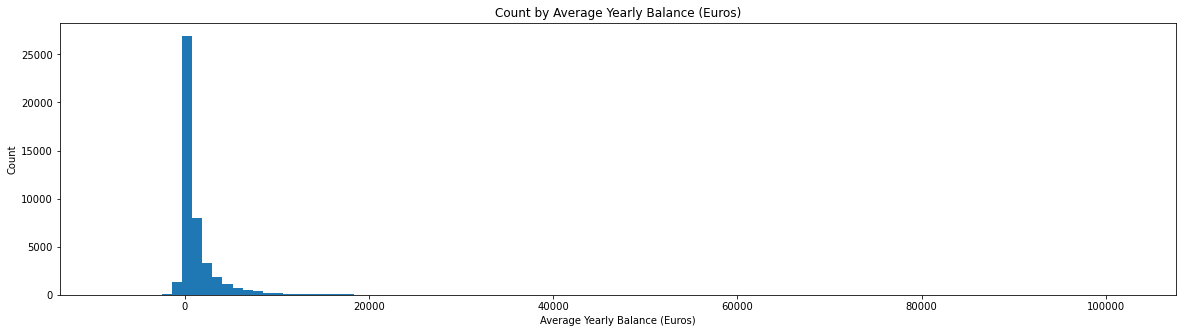

In [23]:
# Exploring balance column 
mpl.rcParams['figure.figsize'] = (20,5)
fig, ax = plt.subplots()
ax.hist(df['balance'], bins=100)
ax.set_xlabel('Average Yearly Balance (Euros)')
ax.set_ylabel('Count')
ax.set_title('Count by Average Yearly Balance (Euros)')
plt.show()

In [24]:
# Creating a new column "balance range" to segment leads easily by balance
for index, row in df.iterrows() :
    if df.loc[index, 'balance'] <= 0 :
        df.loc[index, 'balance range'] = '<= 0'
    elif df.loc[index, 'balance'] <= 1000 :
        df.loc[index, 'balance range'] = '0 to 1K'
    elif df.loc[index, 'balance'] <= 10000 :
        df.loc[index, 'balance range'] = '1K to 10K'
    else :
        df.loc[index, 'balance range'] = '> 10K'

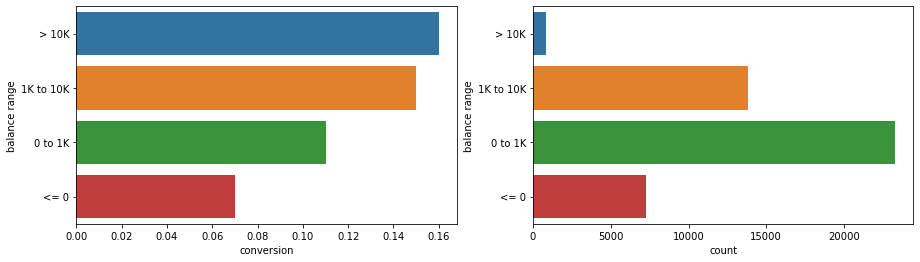

  balance range  conversion
0         > 10K        0.16
1     1K to 10K        0.15
2       0 to 1K        0.11
3          <= 0        0.07


In [25]:
# Exploring balance range
exploring_chart('balance range',df,15,4)

###  <span style="color:red"> Insight N° 2: Leads without any loans are twice as likely to convert as those with loans. </span>

### Combining Relevant Columns: Lead Profile
<ul>
    <li> Leads between 18 and 25 years old, including loan segmentation, increase conversion from 24% to 41% with a broad customer base </li>
    <li> Leads between 26 and 30 years old, including loan segmentation, increase conversion from 14% to 25% with a broad customer base </li>
    <li> Leads between 31 and 40 years old, including loan segmentation, increase conversion from 10% to 16% with a broad customer base </li>
    <li> Leads between 41 and 60 years old, including loan segmentation, increase conversion from 9% to 14% with a broad customer base </li>
    <li> Leads between 26 and 60 years old, need extra segmentation to increase conversion. In next steps, I'm going to work only with this age range to improve conversion </li>

Note: In the next table, mean is conversion, count is numbers of leads, and sum is number of leads converted.

In [26]:
df.groupby(['age range','housing','loan']).conversion.agg(['mean', 'count','sum']).\
sort_values(['age range','mean'], ascending=[True, False]).head(16)

mean  count     sum
age range housing loan                         
18 to 25  no      no    0.408850    565   231.0
                  yes   0.256757     74    19.0
          yes     no    0.106419    592    63.0
                  yes   0.066667    105     7.0
26 to 30  no      no    0.245003   1951   478.0
          yes     no    0.096610   2743   265.0
          no      yes   0.094872    390    37.0
          yes     yes   0.073770    610    45.0
31 to 40  no      no    0.157773   5622   887.0
          yes     no    0.080960   9338   756.0
          no      yes   0.074519    832    62.0
          yes     yes   0.056464   1895   107.0
41 to 60  no      no    0.135508   7970  1080.0
          yes     no    0.068471   8018   549.0
          no      yes   0.062381   1571    98.0
          yes     yes   0.058958   1747   103.0

###  <span style="color:red"> Insight N° 3: The second target will be young adults between 18 to 25 yeards old without personal loans and mortage, who have a conversion over 40%.  </span>

### Exploring Conversion by Campaign Execution Data: Last Campaign
<ul>
    <li> This data has 5 columns:
        <ul>
            <li> Contact: Communication channel </li>
            <li> Campaign: Number of contacts performed during this campaign and for this client (includes last contact) </li>
            <li> Day: Last contact day of the month </li>
            <li> Month: Last contact month of year  </li>
            <li> Duration: Last contact duration, in seconds </li>

####  Contact
<ul>
    <li> Conversions between leads who were contacted by cellular or telephone are quite similars </li>
    <li> Null data was filled with "unknown" </li>
    <li> Contact channel does not have strong relevance in the conversion </li>

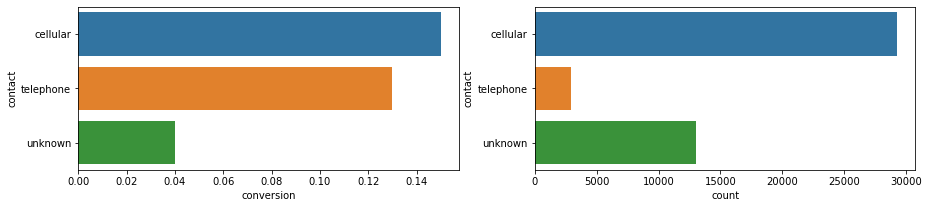

     contact  conversion
0   cellular        0.15
1  telephone        0.13
2    unknown        0.04


In [27]:
# Exploring contact column
exploring_chart('contact',df,15,3)

####  Campaign
<ul>
    <li> Campaign represents the number of calls performed during this campaign for each lead </li>
    <li> The number of calls does not reveal a clear trend, but it is more likely to get conversions in the first calls </li>
    <li> It seems that the first call to a right lead easily converts </li>

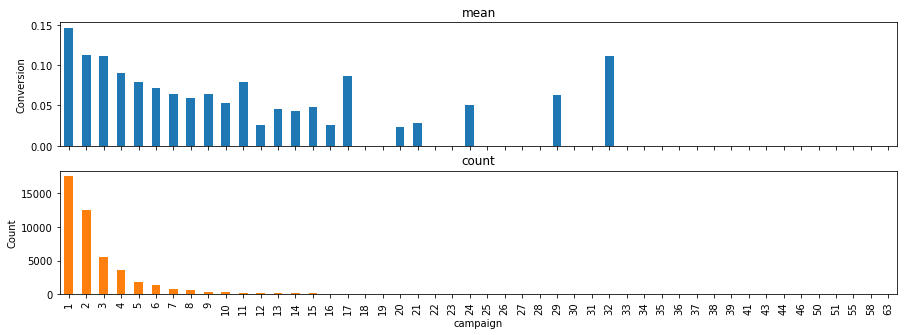

In [28]:
# Exploring campaign column
axes = df.groupby(['campaign']).conversion.agg(['mean', 'count']).plot.bar(figsize=(15, 5), subplots=True, legend=False)
axes[0].set_ylabel('Conversion')
axes[1].set_ylabel('Count')
plt.show()

####  Days
<ul>
    <li> Day column doesn't show a clear correlation between conversion and a specific day of the month </li>
    <li> However, days with a low number of calls have the highest conversion, and when the number of calls increases, the conversion drops </li>
    <li> This could indicate that call quality has been sacrificed to increase the number of calls </li>

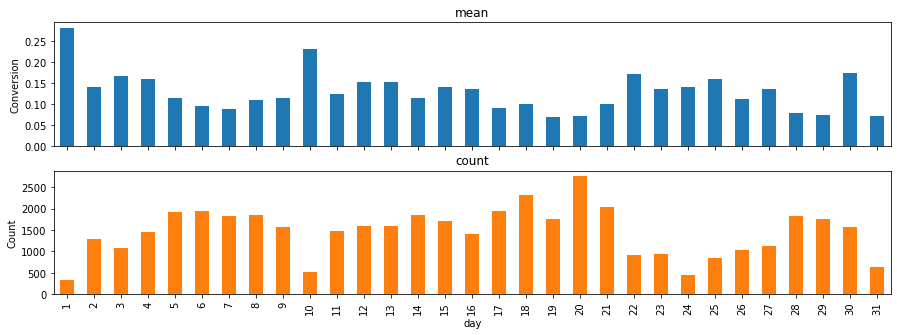

In [29]:
# Exploring day column
axes = df.groupby(['day']).conversion.agg(['mean', 'count']).plot.bar(figsize=(15, 5), subplots=True, legend=False)
axes[0].set_ylabel('Conversion')
axes[1].set_ylabel('Count')
plt.show()

####  Month
<ul>
    <li> Month with high conversion are March, December, September, and October </li>
    <li> However, coincidentally month with a low number of calls have the highest conversion, and when the number of calls increases, the conversion drops </li>
    <li> This could indicate that call quality has been sacrificed to increase the number of calls </li>
    <li> In order to validate if the month is correlated with conversion, next campaign should be in top conversions month with higher number of calls </li>  

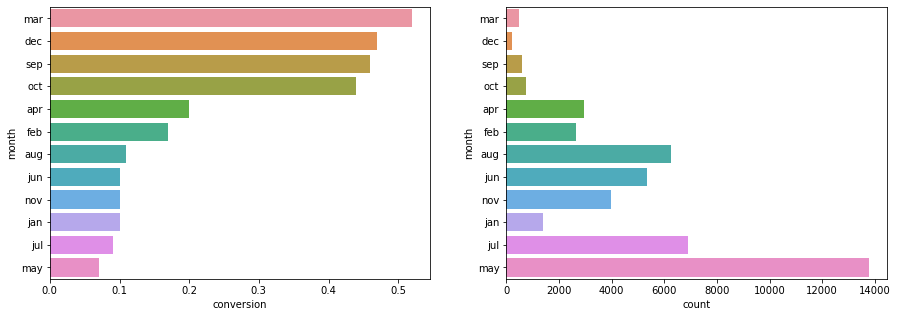

   month  conversion
0    mar        0.52
1    dec        0.47
2    sep        0.46
3    oct        0.44
4    apr        0.20
5    feb        0.17
6    aug        0.11
7    jun        0.10
8    nov        0.10
9    jan        0.10
10   jul        0.09
11   may        0.07


In [30]:
# Exploring month column
exploring_chart('month',df,15,5)

####  Duration
<ul>
    <li> Long calls have greater conversion but this is more a result than a cause, when the lead is interested the call develops longer </li>
    <li> However, agents should be motivated to take long calls as well </li>
    <li> I'm creating a new column "duration range" in minutes to easily segment leads by duration </li>
    <li> Calls with duration over 10 minutes have 48% of conversion </li>    

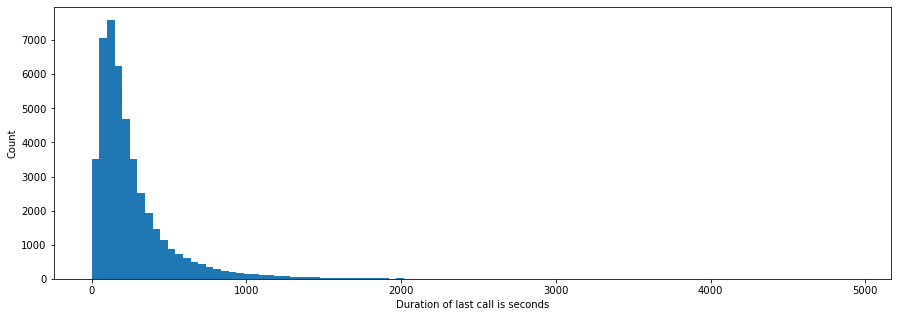

In [31]:
# Exploring duration column 
mpl.rcParams['figure.figsize'] = (15,5)
fig, ax = plt.subplots()
ax.hist(df['duration'], bins=100)
ax.set_ylabel('Count')
ax.set_xlabel('Duration of last call is seconds')
plt.show()

In [32]:
# Creating a new column "duration range" to segment leads easily by balance
for index, row in df.iterrows() :
    if df.loc[index, 'duration'] <= 120 :
        df.loc[index, 'duration range'] = '<= 2 min'
    elif df.loc[index, 'duration'] <= 300 :
        df.loc[index, 'duration range'] = '2 to 5 min'
    elif df.loc[index, 'duration'] <= 600 :
        df.loc[index, 'duration range'] = '5 to 10 min'
    else :
        df.loc[index, 'duration range'] = '> 10 min'

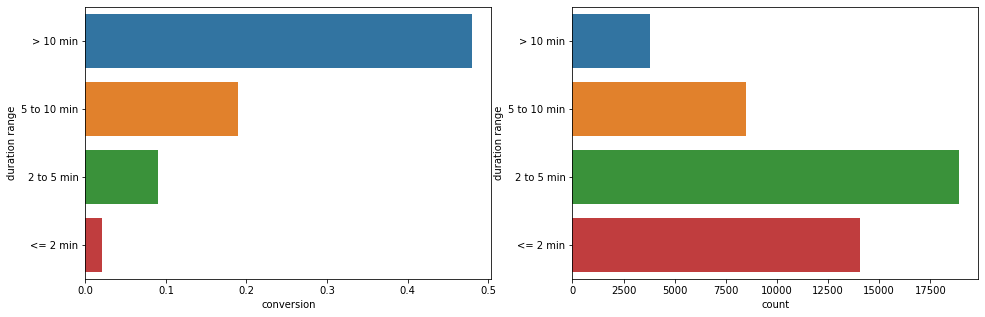

  duration range  conversion
0       > 10 min        0.48
1    5 to 10 min        0.19
2     2 to 5 min        0.09
3       <= 2 min        0.02


In [33]:
# Exploring duration range column
exploring_chart('duration range',df,16,5)

####  Mix month and duration
<ul>
    <li> March, September, October, and December have conversion over 40% </li>
    <li> Surprisingly, these months have a shorter average duration in seconds between 300 to 400, confirming in these months it is easier to convert</li>    

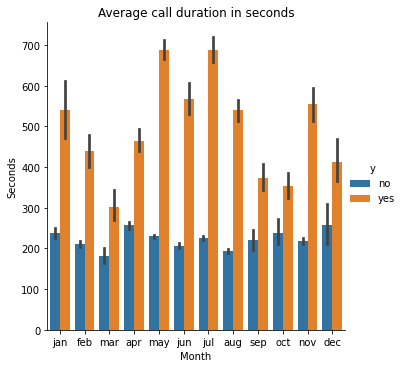

In [34]:
# Exploring impact of mix month and duration
order_month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
fig =sns.catplot(x='month', y='duration', data=df, kind="bar", hue='y', order=order_month)
fig.set_axis_labels('Month','Seconds')
fig.set(title='Average call duration in seconds')
plt.show()

### Exploring Conversion by Campaign Execution Data: Previous Campaign
<ul>
    <li> This data has 3 columns:
        <ul>
            <li> Previous: Number of contacts performed before this campaign and for each lead </li>
            <li> Pdays: Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) </li>
            <li> Poutcome: Outcome of the previous marketing campaign </li>

####  Previous
<ul>
    <li> Previous column represents the number of calls performed in the previous campaign for each lead </li>
    <li> Leads with Zero previous calls are new leads in the last campaign, and represents 82% of total leads </li>
    <li> New leads have the 9% of conversion vs previous leads who have 23% of conversion </li>

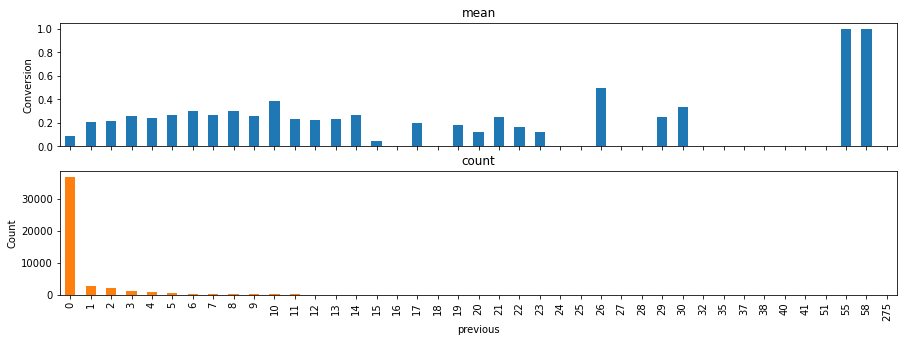

In [35]:
# Exploring previous column
axes = df.groupby(['previous']).conversion.agg(['mean', 'count']).plot.bar(figsize=(15, 5), subplots=True, legend=False)
axes[0].set_ylabel('Conversion')
axes[1].set_ylabel('Count')
plt.show()

In [36]:
# Calculating % of new leads 
round(df['previous'].value_counts(normalize=True).head(1).reset_index(),2)

,index,previous
0,0,0.82


In [37]:
# Creating a new column "Is new" to segment leads easily by previous
for index, row in df.iterrows() :
    if df.loc[index, 'previous'] <= 0 :
        df.loc[index, 'Is new'] = 'Yes'
    else :
        df.loc[index, 'Is new'] = 'No'

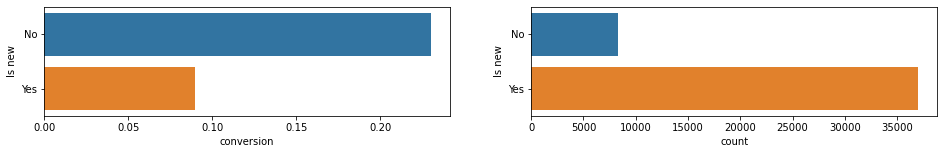

  Is new  conversion
0     No        0.23
1    Yes        0.09


In [38]:
# Exploring "Is new" column
exploring_chart('Is new',df,16,2)

####  Pdays
<ul>
    <li> Pdays represents the number of days that passed by after the lead was last contacted from a previous campaign </li>
    <li> Leads with pdays equal to -1 are new leads in the last campaign, and represents 82% of total leads with 9% of conversion </li>
    <li> Leads contacted before 200 days have 14% of conversion </li>
    <li> Leads contacted after 200 days have 32% of conversion </li>

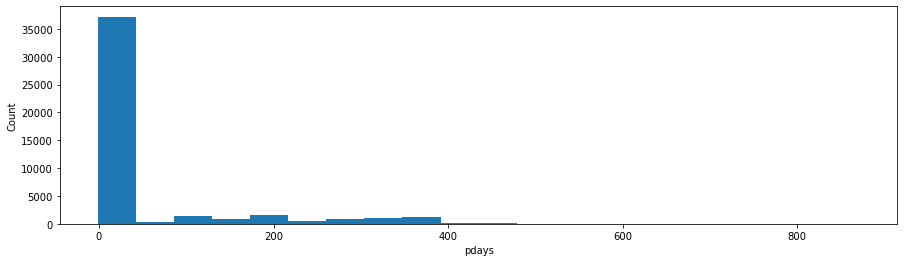

In [39]:
# Exploring pdays column
mpl.rcParams['figure.figsize'] = (15,4)
fig, ax = plt.subplots()
ax.hist(df['pdays'], bins=20)
ax.set_ylabel('Count')
ax.set_xlabel('pdays')
plt.show()

In [40]:
# Creating a new column "pdays range" to segment leads easily by pdays
for index, row in df.iterrows() :
    if df.loc[index, 'pdays'] <= 0 :
        df.loc[index, 'pdays range'] = 'New'
    elif df.loc[index, 'pdays'] <= 200 :
        df.loc[index, 'pdays range'] = '< 200 days'
    else :
        df.loc[index, 'pdays range'] = '> 200 days'

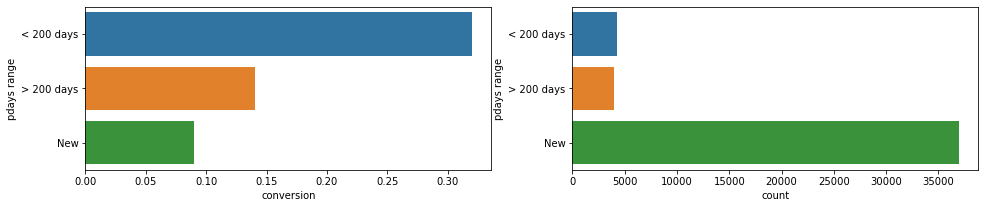

  pdays range  conversion
0  < 200 days        0.32
1  > 200 days        0.14
2         New        0.09


In [41]:
# Exploring pdays column
exploring_chart('pdays range',df,16,3)

####  Poutcome
<ul>
    <li> Poutcome represents the outcome of the previous marketing campaign </li>
    <li> New leads was filled with "unknown" </li>
    <li> Lead who suscribed to tern deposit in the previous campaign have 65% of conversion in the last campaign. They must be the first contacted in each campaign. </li>

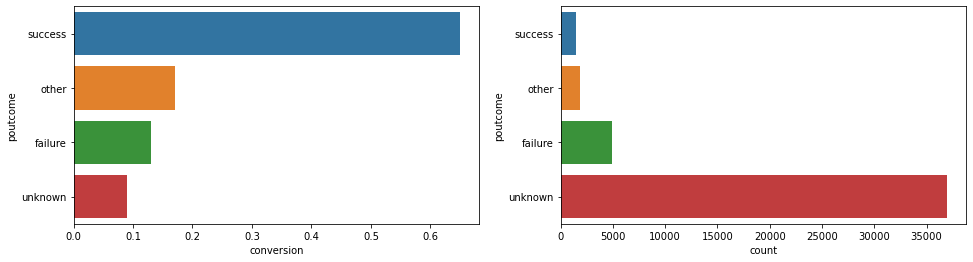

  poutcome  conversion
0  success        0.65
1    other        0.17
2  failure        0.13
3  unknown        0.09


In [42]:
# Exploring poutcome column
exploring_chart('poutcome',df,16,4)

### Slicing adults (25-60) segment

<ul>
    <li> Leads between 25 to 60 years old have an overall conversion at 10% </li>
    <li> Applying extra segmentation by loans and contact channels increases conversion by up to 19%, 
reducing the cost per conversion almost 50% </li> </ul>
Note: In the next table, mean is conversion, count is numbers of leads, and sum is number of leads converted.
    

In [43]:
# Slicing adults in a new df call df_adults 
df_adults=df[(df['age']>25) & (df['age']<=60)]

# Calculating overall df_adults conversion 
print("{:.0%}".format(df_adults['conversion'].mean()))

10%


In [44]:
# Exploring segmentation by loans and contact channel
df_adults.groupby(['housing','loan','contact']).conversion.agg(['mean', 'count','sum']).\
sort_values('mean', ascending=False)

mean  count     sum
housing loan contact                           
no      no   cellular   0.190829  11340  2164.0
             telephone  0.134247   1095   147.0
yes     no   cellular   0.103692  11592  1202.0
no      yes  cellular   0.078337   2068   162.0
yes     yes  cellular   0.074655   2612   195.0
             telephone  0.071823    181    13.0
        no   telephone  0.064315    964    62.0
no      yes  telephone  0.058559    222    13.0
             unknown    0.043738    503    22.0
        no   unknown    0.043115   3108   134.0
yes     no   unknown    0.040567   7543   306.0
        yes  unknown    0.032214   1459    47.0

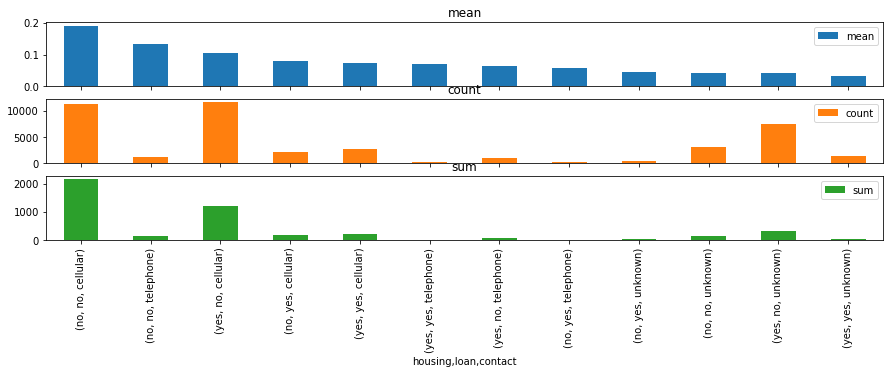

In [45]:
# Exploring segmentation by loans and contact channel
df_adults.groupby(['housing','loan','contact']).conversion.agg(['mean', 'count','sum']).\
sort_values('mean', ascending=False).plot.bar(subplots=True)
plt.show()

###  <span style="color:red"> Insight N° 4: The third target will be adults between 26 to 60 yeards old without personal loans and mortage, and they must be contacted by cellular to increase conversion by up to 19%, reducing the cost per conversion almost 50%.  </span>

# 4. Conclusions
<ul>
    <li> Segmentation by age has a strong impact on conversions, and will be the first step in the targeting process. Leads over 60 years old will be our first target with conversion over 40%. </li>
    <li> Leads without any loans are twice as likely to convert as those with loans.  </li>
    <li> The second target will be young adults between 18 to 25 yeards old without personal loans and mortage, who have a conversion over 40%. </li>
    <li> The third target will be adults between 26 to 60 yeards old without personal loans and mortage, and they must be contacted by cellular to increase conversion by up to 19%, reducing the cost per conversion almost 50% </li>

# 5. Recommendations
<ul>
    <li> Month with high conversion are March, December, September, and October. However, coincidentally month with a low number of calls have the highest conversion, and when the number of calls increases, the conversion drops. In order to validate if the month is correlated with conversion, next campaign should be in top conversions month with higher number of calls </li>
    <li> Also, identify what marketing activities were carried out in these months and get more information about the context in order to understand why these months have high convertions </li>